In [1]:
from tweety import Twitter
from tweety.filters import SearchFilters
import pandas as pd

In [2]:
from tweety import Twitter

auth_token = """d64beac3ac7ff9c48f2d993eb6646110cb2556ac"""

# Cookies can be a str or a dict

app = Twitter("session9")
app.load_auth_token(auth_token)
print(app.me)

User(id=1743086770739171328, username=EuarExperiment, name=euar_experiment, verified=False)


In [3]:
app.start()
print(app.me)

User(id=1743086770739171328, username=EuarExperiment, name=euar_experiment, verified=False)

In [10]:
all_tweets = app.search('war', pages=5, wait_time=2)
all_tweets

Search(keyword=war, count=98, filter=None)

In [15]:
print(app.me)

User(id=1743086770739171328, username=EuarExperiment, name=euar_experiment, verified=False)


In [23]:
df_tweets = pd.DataFrame(columns=["Text"])

In [24]:
tweets = app.search('pacifist',pages=5, wait_time=20)
for tweet in tweets:
    new_row = pd.DataFrame({
    "Text": [tweet.text],
        })
    df_tweets = pd.concat([df_tweets, new_row], ignore_index=True)

In [27]:
tweets = app.search('war',pages=5, wait_time=20)
for tweet in tweets:
    new_row = pd.DataFrame({
    "Text": [tweet.text],
        })
    df_tweets = pd.concat([df_tweets, new_row], ignore_index=True)

In [28]:
print(f"Total rows in the DataFrame: {df_tweets.shape[0]}")

df_tweets.to_csv('tweets_data.csv', index=False)

print(df_tweets)

Total rows in the DataFrame: 197
                                                  Text
0    thinking about how monster kid became a papyru...
1    #UndertaleYellow #undertaleyellowfanart\nA wha...
2    COME AND TAKE IT\n\n“An outlaw princess hiding...
3    Pacifist Ceroba Battle 💛\n#UndertaleYellowFana...
4    (SPOILERS FOR UTY PACIFIST ENDING)\n\n(1/2) Wh...
..                                                 ...
192  We can imagine how this highly sensitive indiv...
193  12 takeaways from the Putin Carlson Conversati...
194  Medical teams are trying to revive the heart o...
195  Hitler announces the declaration of war agains...
196  Putin was ready to settle dispute with Ukraine...

[197 rows x 1 columns]


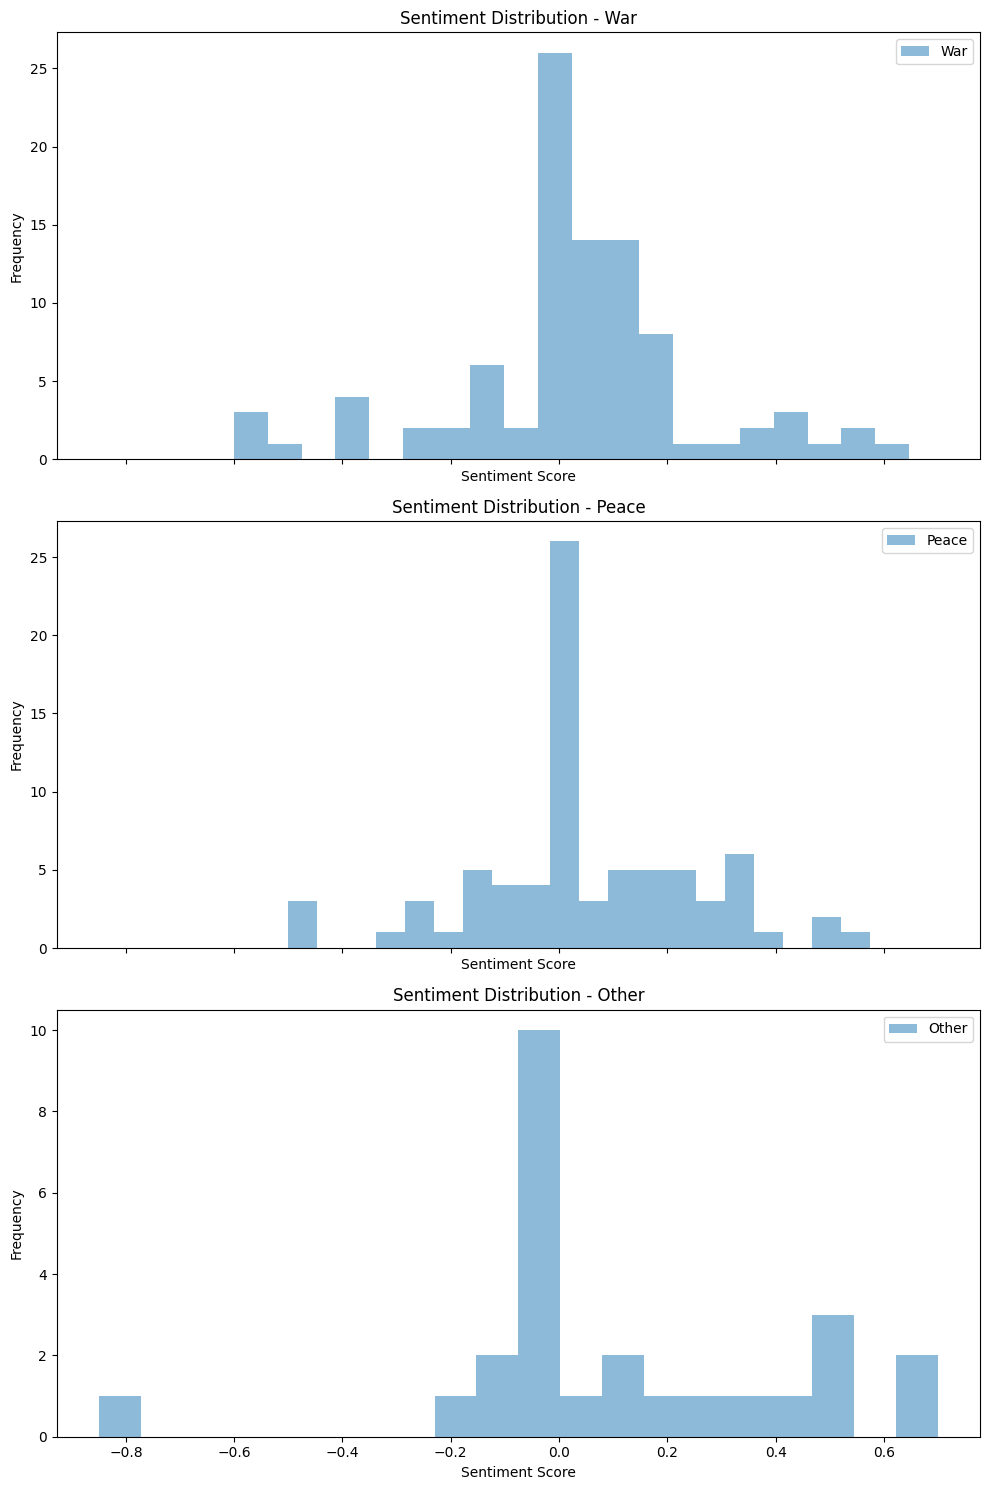

In [31]:
import pandas as pd
import matplotlib.pyplot as plt
from textblob import TextBlob

def analyze_sentiment(sentence):
    analysis = TextBlob(sentence)
    sentiment = analysis.sentiment.polarity
    return sentiment, "Positive" if sentiment > 0 else "Negative" if sentiment < 0 else "Neutral"

# Define keywords for grouping
war_keywords = ["war"]
peace_keywords = ["pacifist"]

# Group sentences by "War" and "Peace" with sentiment analysis
grouped_sentences = {'War': [], 'Peace': [], 'Other': []}

# Lists to store sentiment scores for plotting
sentiment_scores = {'War': [], 'Peace': [], 'Other': []}

for idx, sentence in enumerate(df_tweets["Text"]):
    sentiment_score, sentiment = analyze_sentiment(sentence)

    if any(keyword in sentence.lower() for keyword in war_keywords):
        grouped_sentences['War'].append(sentiment)
        sentiment_scores['War'].append(sentiment_score)
    elif any(keyword in sentence.lower() for keyword in peace_keywords):
        grouped_sentences['Peace'].append(sentiment)
        sentiment_scores['Peace'].append(sentiment_score)
    else:
        grouped_sentences['Other'].append(sentiment)
        sentiment_scores['Other'].append(sentiment_score)

# Plot sentiment for each category on its own subplot
fig, axes = plt.subplots(3, 1, figsize=(10, 15), sharex=True)

for ax, (category, scores) in zip(axes, sentiment_scores.items()):
    ax.hist(scores, bins=20, alpha=0.5, label=category)
    ax.set_title(f'Sentiment Distribution - {category}')
    ax.set_xlabel('Sentiment Score')
    ax.set_ylabel('Frequency')
    ax.legend()

plt.tight_layout()
plt.show()


In [36]:
import nltk
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/andrewwong/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     /Users/andrewwong/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [38]:
import pandas as pd
from textblob import TextBlob
from collections import Counter
from nltk.corpus import stopwords
import matplotlib.pyplot as plt
from wordcloud import WordCloud


# Define keywords for grouping
war_keywords = ["war"]
peace_keywords = ["pacifism"]

# Group sentences by "War" and "Peace" with sentiment analysis
grouped_sentences = {'War': [], 'Peace': [], 'Other': []}

for idx, sentence in enumerate(df_tweets["Text"]):
    sentiment_score, sentiment = analyze_sentiment(sentence)

    if any(keyword in sentence.lower() for keyword in war_keywords):
        grouped_sentences['War'].append(sentence)
    elif any(keyword in sentence.lower() for keyword in peace_keywords):
        grouped_sentences['Peace'].append(sentence)
    else:
        grouped_sentences['Other'].append(sentence)

# Concatenate all sentences in the "Other" category
other_sentences = ' '.join(grouped_sentences['Other'])

# Tokenize the text into words
words = TextBlob(other_sentences).words

# Remove stop words
stop_words_set = set(stopwords.words('english'))
filtered_words = [word.lower() for word in words if word.lower() not in stop_words_set]

# Count the frequency of each word
word_counts = Counter(filtered_words)

# Print the most common words
most_common_words = word_counts.most_common(10)
print("Most Common Words in 'Other' Category:")
for word, count in most_common_words:
    print(f"{word}: {count}


SyntaxError: incomplete input (1443724544.py, line 45)

In [35]:
python -m textblob.download_corpora


SyntaxError: invalid syntax (2561482677.py, line 1)